In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [6]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "whitegrid")

In [7]:
file_path = "fake_reviews_dataset.csv"

In [8]:
df = pd.read_csv("fake_reviews_dataset.csv")

In [9]:
df.head()

,category,rating,label,text_,user_id,date
0,Electronics_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",4248,2022-07-04
1,Books_5,5.0,CG,"love it, a great upgrade from the original. I...",8974,2022-12-02
2,Electronics_5,5.0,CG,This pillow saved my back. I love the look and...,839,2022-03-13
3,Electronics_5,5.0,CG,"Missing information on how to use it, but it i...",4257,2022-12-14
4,Electronics_5,5.0,CG,Very nice set. Good quality. We have had the s...,7690,2022-03-02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   user_id   40432 non-null  int64  
 5   date      40432 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.9+ MB


In [11]:
df.columns

Index(['category', 'rating', 'label', 'text_', 'user_id', 'date'], dtype='object')

In [12]:
df.rename(columns = {"text_":"review"}, inplace = True)

In [13]:
df.columns

Index(['category', 'rating', 'label', 'review', 'user_id', 'date'], dtype='object')

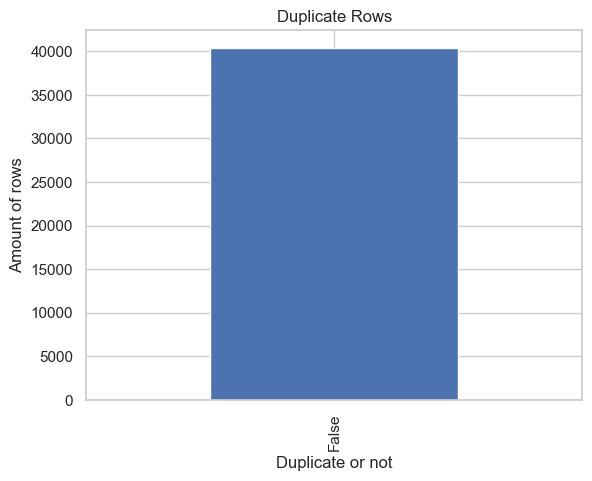

In [14]:
df.duplicated().value_counts().plot(kind = "bar")
plt.title("Duplicate Rows")
plt.xlabel("Duplicate or not")
plt.ylabel("Amount of rows")
plt.show()

In [15]:
df.isna().sum()

category    0
rating      0
label       0
review      0
user_id     0
date        0
dtype: int64

In [16]:
df['label'] = df['label'].map({'CG': 1, 'OR': 0})

In [17]:
df.head()

,category,rating,label,review,user_id,date
0,Electronics_5,5.0,1,"Love this! Well made, sturdy, and very comfor...",4248,2022-07-04
1,Books_5,5.0,1,"love it, a great upgrade from the original. I...",8974,2022-12-02
2,Electronics_5,5.0,1,This pillow saved my back. I love the look and...,839,2022-03-13
3,Electronics_5,5.0,1,"Missing information on how to use it, but it i...",4257,2022-12-14
4,Electronics_5,5.0,1,Very nice set. Good quality. We have had the s...,7690,2022-03-02


In [18]:
df.shape[0]

40432

In [19]:
round((df["label"].value_counts()[1]/df.shape[0])*100,2)

np.float64(50.0)

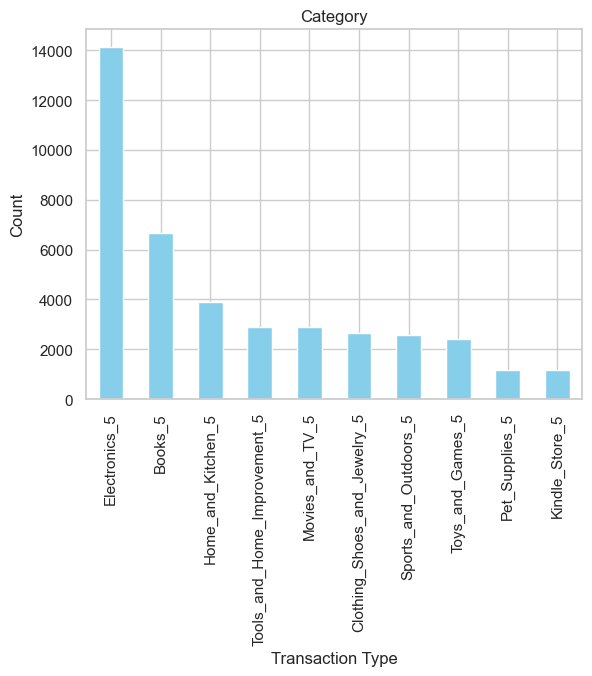

In [20]:
df["category"].value_counts().plot(kind="bar",title = "Category",color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

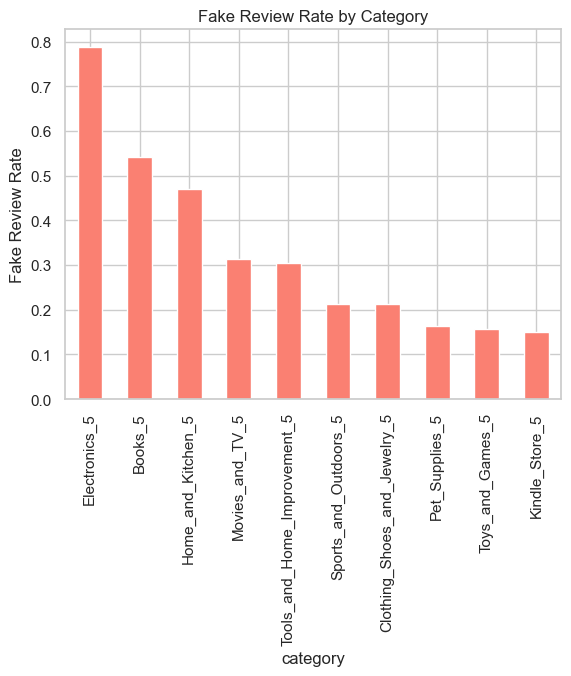

In [21]:
fake_by_type = df.groupby("category")["label"].mean().sort_values(ascending = False)
fake_by_type.plot(kind="bar",title = "Fake Review Rate by Category",color = "salmon")
plt.ylabel("Fake Review Rate")
plt.show()

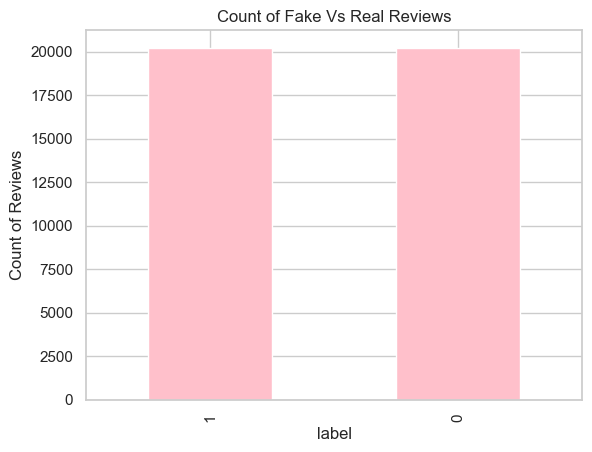

In [22]:
df["label"].value_counts().plot(kind="bar",title = "Count of Fake Vs Real Reviews",color = "pink")
plt.xlabel("label")
plt.ylabel("Count of Reviews")
plt.show()

In [23]:
df["label"].describe().astype(int)

count    40432
mean         0
std          0
min          0
25%          0
50%          0
75%          1
max          1
Name: label, dtype: int64

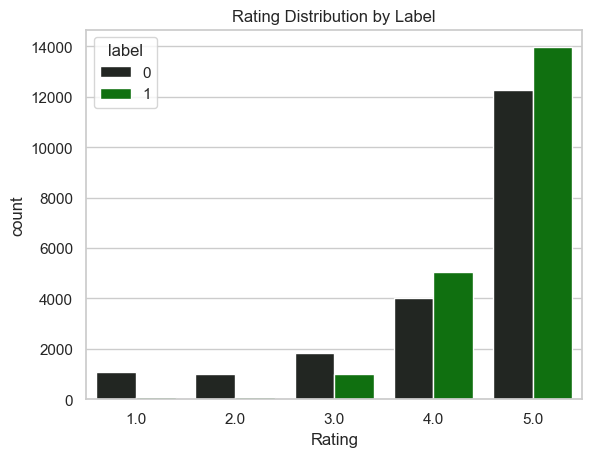

In [24]:
sns.countplot(x = df["rating"], hue = df["label"],color = "green")
plt.title("Rating Distribution by Label")
plt.xlabel("Rating")
plt.show()

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['month'] = df['date'].dt.to_period('M').astype(str)

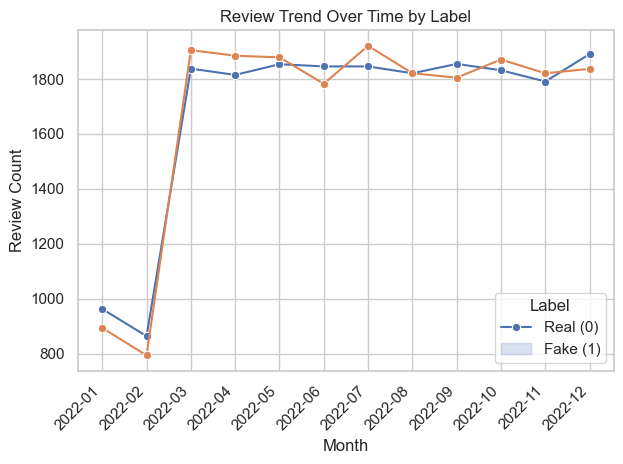

In [27]:
label_by_time = df.groupby(['month', 'label']).size().reset_index(name='count')
sns.lineplot(data= label_by_time, x='month', y='count', hue='label', marker='o', color ="blue")
plt.title("Review Trend Over Time by Label")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Label", labels=["Real (0)", "Fake (1)"])
plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['category', 'rating', 'label', 'review', 'user_id', 'date', 'month'], dtype='object')

In [29]:
df.drop(columns = "month", inplace = True)

In [30]:
df.head()

,category,rating,label,review,user_id,date
0,Electronics_5,5.0,1,"Love this! Well made, sturdy, and very comfor...",4248,2022-07-04
1,Books_5,5.0,1,"love it, a great upgrade from the original. I...",8974,2022-12-02
2,Electronics_5,5.0,1,This pillow saved my back. I love the look and...,839,2022-03-13
3,Electronics_5,5.0,1,"Missing information on how to use it, but it i...",4257,2022-12-14
4,Electronics_5,5.0,1,Very nice set. Good quality. We have had the s...,7690,2022-03-02


In [31]:
top_reviewer = df["user_id"].value_counts().head(10)

In [32]:
top_reviewer

user_id
8652     12
2974     11
2123     11
9272     11
2174     11
4827     11
6084     10
11175    10
835      10
1057     10
Name: count, dtype: int64

In [33]:
top_fake_reviewers = df[df["label"] == 1]["user_id"].value_counts().head(10)

In [34]:
top_fake_reviewers

user_id
2974     9
4827     8
8680     7
3880     7
12626    7
2174     7
4806     7
8412     7
835      7
2781     7
Name: count, dtype: int64

In [35]:
df['rating'] = df['rating'].astype(float)

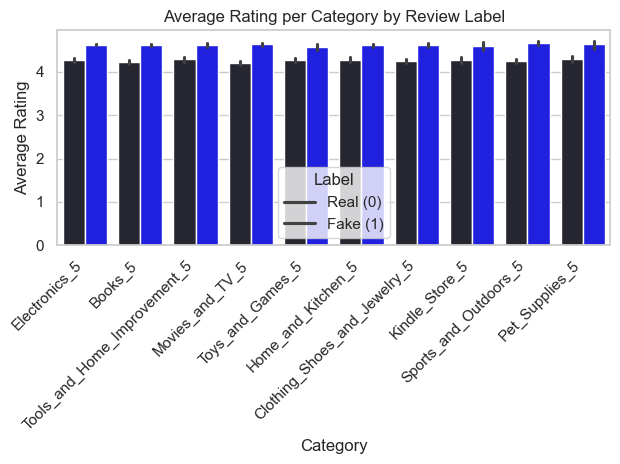

In [36]:
sns.barplot(data=df, x='category', y='rating', hue='label', color = "blue")
plt.title("Average Rating per Category by Review Label")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Label", labels=["Real (0)", "Fake (1)"])
plt.tight_layout()
plt.show()


In [37]:
df.columns = [c.lower().strip() for c in df.columns]

In [38]:
df['review'] = df['review'].astype(str)

In [39]:
df['label'] = df['label'].astype(int)

In [40]:
df['review_length'] = df['review'].apply(len)

In [41]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [42]:
df['exclamations'] = df['review'].apply(lambda x: x.count('!'))

In [43]:
df['uppercase_words'] = df['review'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

In [44]:
df['avg_word_length'] = df['review'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)
df['sentiment_score'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [45]:
keywords = ["scam", "free", "must buy", "fake", "authentic", "original", "waste", "money"]
df['keyword_presence'] = df['review'].apply(lambda x: int(any(word in x.lower() for word in keywords)))

In [46]:
corr = df[["rating", "review_length", "word_count", "exclamations", "uppercase_words", "avg_word_length", "sentiment_score", "keyword_presence"]].corr()

In [47]:
corr 

,rating,review_length,word_count,exclamations,uppercase_words,avg_word_length,sentiment_score,keyword_presence
rating,1.000000,-0.086333,-0.078457,0.018479,-0.040274,-0.028756,0.241034,-0.068336
review_length,-0.086333,1.000000,0.992977,0.159693,0.580483,0.050420,-0.128620,0.240757
word_count,-0.078457,0.992977,1.000000,0.159489,0.605248,-0.017041,-0.126349,0.239664
exclamations,0.018479,0.159693,0.159489,1.000000,0.188555,0.030670,0.065487,0.044049
uppercase_words,-0.040274,0.580483,0.605248,0.188555,1.000000,-0.090232,-0.044821,0.148102
avg_word_length,-0.028756,0.050420,-0.017041,0.030670,-0.090232,1.000000,0.026354,0.010319
sentiment_score,0.241034,-0.128620,-0.126349,0.065487,-0.044821,0.026354,1.000000,-0.033754
keyword_presence,-0.068336,0.240757,0.239664,0.044049,0.148102,0.010319,-0.033754,1.000000


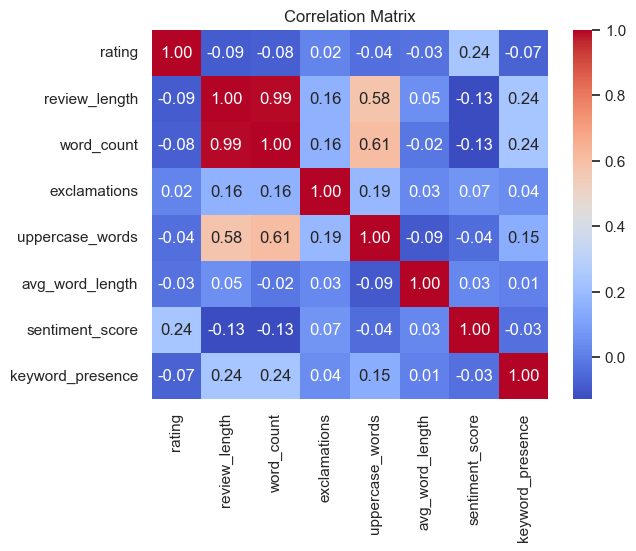

In [48]:
sns.heatmap(corr,annot=True,cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [49]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
df_model = df.drop(columns=["user_id", "date"],axis = 1)

In [51]:
text_col = 'review'
categorical = ['category']
numeric = ["rating", "review_length", "word_count", "exclamations", "uppercase_words", "avg_word_length", "sentiment_score", "keyword_presence"]

In [52]:
y = df_model['label']
X = df_model[[text_col] + categorical + numeric]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [54]:
preprocessor = ColumnTransformer(transformers=[
    ("text", TfidfVectorizer(max_features=3000, stop_words='english'), "review"),
    ("num", StandardScaler(), numeric),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical)
])

In [55]:
base_model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
])
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv=3)

In [56]:
calibrated_model.fit(X_train, y_train)

CalibratedClassifierCV(cv=3,
                       estimator=Pipeline(steps=[('prep',
                                                  ColumnTransformer(transformers=[('text',
                                                                                   TfidfVectorizer(max_features=3000,
                                                                                                   stop_words='english'),
                                                                                   'review'),
                                                                                  ('num',
                                                                                   StandardScaler(),
                                                                                   ['rating',
                                                                                    'review_length',
                                                                                    'word_count',
                                                                                    'exclamations',
                                                                                    'uppercase_words',
                                                                                    'avg_word_length',
                                                                                    'sentiment_score',
                                                                                    'keyword_presence']),
                                                                                  ('cat',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['category'])])),
                                                 ('clf',
                                                  RandomForestClassifier(class_weight='balanced',
                                                                         random_state=42))]))

In [57]:
y_pred = calibrated_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(calibrated_model.score(X_test, y_test) * 100))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6065
           1       0.88      0.89      0.89      6065

    accuracy                           0.89     12130
   macro avg       0.89      0.89      0.89     12130
weighted avg       0.89      0.89      0.89     12130

Accuracy: 88.59%


In [58]:
import joblib

joblib.dump(calibrated_model,"fake_review_detection.pkl")

['fake_review_detection.pkl']